In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df_camp=pd.read_csv("marketing_AB.csv")
df_camp.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


In [3]:
df_selected=df_camp.drop('Unnamed: 0', axis=1)
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [4]:
df_selected.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user id,588101.0,NaN,NaN,NaN,1310692.215793,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
test group,588101,2,ad,564577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
converted,588101,2,False,573258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total ads,588101.0,NaN,NaN,NaN,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads day,588101,7,Friday,92608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most ads hour,588101.0,NaN,NaN,NaN,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


In [5]:
df_selected.shape

(588101, 6)

In [6]:
df_selected.nunique()

user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [7]:
df_selected.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [8]:
# check duplicate value.
df_selected.duplicated().sum()

0

In [9]:
df_selected[df_selected["user id"].duplicated()].count()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [10]:
# show two group names.
df_selected['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [11]:
# show two converted value.
df_selected['converted'].unique()

array([False,  True])

In [12]:
# Days of running campaign
sorted(df_selected['most ads day'].unique())

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [13]:
# Days of running campaign
np.array(sorted(df_selected['most ads hour'].unique()))


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [14]:
df_selected['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [15]:
df_selected['test group'].value_counts(normalize=True)

test group
ad     0.96
psa    0.04
Name: proportion, dtype: float64

In [16]:
df_selected['converted'].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [17]:
df_selected['converted'].value_counts(normalize=True)

converted
False    0.974761
True     0.025239
Name: proportion, dtype: float64

In [18]:
df_selected.groupby('test group')['converted'].value_counts()

test group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: count, dtype: int64

In [19]:
df_selected.groupby('test group')['converted'].value_counts(normalize=True)

test group  converted
ad          False        0.974453
            True         0.025547
psa         False        0.982146
            True         0.017854
Name: proportion, dtype: float64

In [20]:
group_ad=df_selected[df_selected['test group']=='ad']
group_psa=df_selected[df_selected['test group']=='psa']

In [21]:
group_ad['converted'].mean()

0.025546559636683747

In [22]:
group_psa['converted'].mean()

0.01785410644448223

In [23]:
estimate_list_ad = []
for i in range(10000):
    estimate_list_ad.append(group_ad['converted'].sample(n=5000,replace=True).mean())

In [24]:
estimate_df_ad = pd.DataFrame(data={'estimate': estimate_list_ad})
estimate_df_ad

,estimate
0,0.0260
1,0.0252
2,0.0224
3,0.0250
4,0.0252
...,...
9995,0.0290
9996,0.0236
9997,0.0276
9998,0.0252


In [25]:
estimate_list_psa = []
for i in range(10000):
    estimate_list_psa.append(group_psa['converted'].sample(n=5000,replace=True).mean())

In [26]:
estimate_df_psa = pd.DataFrame(data={'estimate': estimate_list_psa})
estimate_df_psa

,estimate
0,0.0164
1,0.0152
2,0.0170
3,0.0176
4,0.0164
...,...
9995,0.0196
9996,0.0172
9997,0.0192
9998,0.0184


In [27]:
estimate_df_ad.mean()

estimate    0.025562
dtype: float64

In [28]:
estimate_df_psa.mean()

estimate    0.017874
dtype: float64

<Axes: >

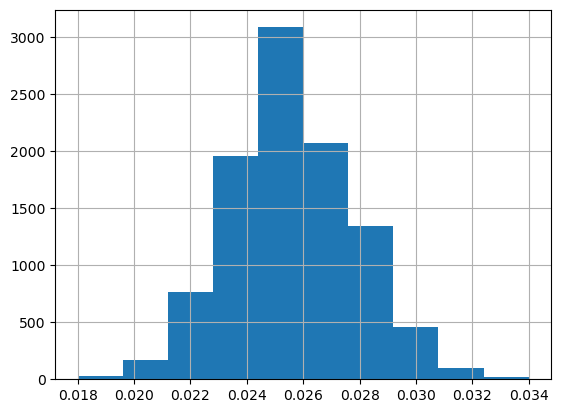

In [29]:
# ad group
estimate_df_ad['estimate'].hist()

<Axes: >

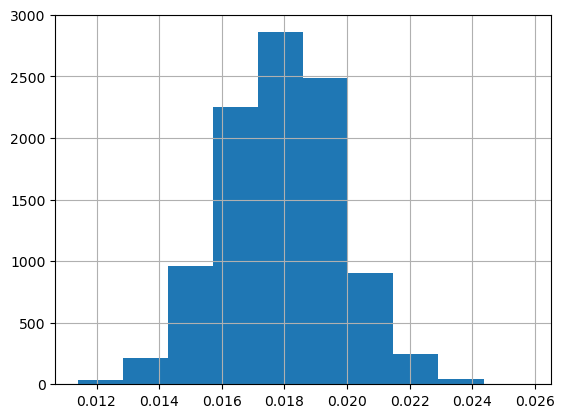

In [30]:
# psa group
estimate_df_psa['estimate'].hist()

In [31]:
t_statistic, p_value = stats.ttest_ind(estimate_df_ad,estimate_df_psa,equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: [264.32898702]
P-value: [0.]
